
# Skin Detection Project

You are given the following csv files (the separator is a ```;```):

```
Project_files/data/2016material-fake.csv
Project_files/data/2016material.csv
Project_files/data/2016skin.csv
Project_files/data/Fleisch.csv
Project_files/data/Holz.csv
Project_files/data/Leder.csv
Project_files/data/Stoff.csv
Project_files/data/Referenz-Haut_6-Klassen.csv
```

They contain materials and their reflectance factor over certain wavelengths. This data was created for a security application where a system should detect skin and distinguish it from non skin.

The files ``Project_files/data/2016skin.csv`` and ``Project_files/data/Referenz-Haut_6-Klassen.csv`` contain measurements for skin. All other files contain measurements for different materials that are not skin.

Your task is to train a classifier that can predict skin vs non skin.

### Details

Your report should be a single Jupyter Notebook and include:

- Cleaning the data
- Visualize the data in a meaningful way
- Measure statistical parameters of the data
- Compare the performance of different classifiers (you can use the ones from sklearn)
- Evaluate your classifiers in a meaningful way using appropriate metrics (such as memory consumption, time, F1, accuracy etc)
- Train for two scenarios, one should minimize the chance of false positives (classifying non skin as skin), one should minimize the chance of false negatives (classifying skin as non skin). Visualize the trade-off between false positives and false negatives if applicable.


In [2]:
import pandas as pd

files = [
    'Project_files/data/2016material-fake.csv',
    'Project_files/data/2016material.csv',
    'Project_files/data/2016skin.csv',
    'Project_files/data/Fleisch.csv',
    'Project_files/data/Holz.csv',
    'Project_files/data/Leder.csv',
    'Project_files/data/Stoff.csv',
    'Project_files/data/Referenz-Haut_6-Klassen.csv'
]

**Import Statements**

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import time
import tracemalloc
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, log_loss
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, f1_score, roc_auc_score,recall_score, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
# !pip install imblearn
# !pip install delayed
import imblearn
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

**Cleaning the data**

In the below function raw data is cleaned by replacing comma decimal by point decimal and then eliminating NAN. Then scaling of features is performed, followed by PCA operation to perform dimensionality reduction on number of features. At last, label column is added to the data frame and assigned value 0 if data contains non-skin features or assigned value 1 if data contains skin features.

In [4]:
def cleaning_raw_data(data_file,name,skin,decimal_separator):
    if decimal_separator == "point_has_decimal_separator":
        data_file = pd.read_csv(data_file,delimiter=';',  dtype="float64")
    elif decimal_separator == "comma_has_decimal_separator":
        data_file = pd.read_csv(data_file,sep=";" , decimal=',', dtype="float64")
        
    #Removing NAN values from the data
    data_file = data_file.dropna().T
    data_file = data_file[1:]
    data_file.columns = data_file.iloc[0]
    
    #Performing scaling of features of the data
    sc = MinMaxScaler()
    data_file = sc.fit_transform(data_file)
    
    #Reducing number of features present in the data to 6 using PCA
    feature_reduction = PCA(n_components = 6)
    feature_reduction.fit(data_file.T)
    final_features = feature_reduction.components_.T
    data_file = pd.DataFrame(final_features)
    
    #Adding a new column called label. If file contains non-skin data then value 0 is assigned and if the file contains skin data then value 1 is assigned to label
    if skin == "fake_skin":
        labels = pd.DataFrame(np.zeros(data_file.shape[0]), columns=["label"])
        data_file['label'] = labels
    elif skin == "real_skin":
        labels = pd.DataFrame(np.ones(data_file.shape[0]), columns=["label"])
        data_file['label'] = labels
    return data_file

**1. 2016material_fake file data**

In [5]:
file1_2016material_fake = cleaning_raw_data(files[0],"2016material_fake","fake_skin","point_has_decimal_separator")
print("First 10 rows after cleaning of data")
print("*"*39)
print(file1_2016material_fake.head(10))

First 10 rows after cleaning of data
***************************************
          0         1         2         3         4         5  label
0  0.015818  0.024552 -0.093773 -0.020662  0.017595  0.012953    0.0
1 -0.000922  0.027029 -0.080129 -0.021222  0.003504  0.017605    0.0
2 -0.012780 -0.034194  0.099579 -0.055327  0.012024  0.086690    0.0
3 -0.006345  0.016926  0.046307  0.010216 -0.004397  0.002007    0.0
4 -0.016663  0.020053  0.043827  0.080401 -0.052600  0.070330    0.0
5  0.055079 -0.106585  0.128199  0.289881 -0.109273  0.117112    0.0
6 -0.069659 -0.067730 -0.008407  0.205863  0.078620 -0.071845    0.0
7 -0.096014 -0.034966 -0.026675  0.140692  0.086695 -0.095203    0.0
8 -0.101722 -0.137166 -0.002007  0.066574  0.234741  0.163215    0.0
9  0.041779 -0.028004  0.048102  0.343942  0.394993  0.031301    0.0


**2. 2016material data file**

In [6]:
file2_2016material = cleaning_raw_data(files[1],"2016material","fake_skin","point_has_decimal_separator")
print("First 10 rows after cleaning of data")
print("*"*39)
print(file2_2016material.head(10))

First 10 rows after cleaning of data
***************************************
          0         1         2         3         4         5  label
0 -0.007729  0.011512  0.008020 -0.004716 -0.020628 -0.002234    0.0
1 -0.005054  0.013436  0.013393 -0.009928 -0.032989  0.009811    0.0
2 -0.011352  0.018415  0.000536 -0.026367 -0.011187 -0.058609    0.0
3 -0.364302  0.274039  0.111512  0.100104  0.058221 -0.245145    0.0
4 -0.153447  0.210440 -0.453441  0.008194 -0.133542 -0.064964    0.0
5 -0.074501  0.123559 -0.373034 -0.059257 -0.119798  0.280895    0.0
6 -0.404625 -0.052802  0.068963 -0.370890  0.119919  0.489285    0.0
7 -0.040449 -0.039548  0.001845  0.089112  0.003939  0.039427    0.0
8  0.007003  0.011485  0.004271 -0.022890 -0.015703 -0.026864    0.0
9 -0.004082  0.026852 -0.025788 -0.020861 -0.036820  0.002272    0.0


**3. 2016skin data file**

In [7]:
file3_2016skin = cleaning_raw_data(files[2],"2016skin","real_skin","point_has_decimal_separator")
print("First 10 rows after cleaning of data")
print("*"*39)
print(file3_2016skin.head(10))

First 10 rows after cleaning of data
***************************************
          0         1         2         3         4         5  label
0  0.005823  0.018524  0.005143 -0.025413 -0.038089 -0.039687    1.0
1  0.024688 -0.002188  0.002650 -0.054183 -0.008642 -0.029392    1.0
2  0.026774  0.011750 -0.015136 -0.014235 -0.023065 -0.014860    1.0
3  0.022253  0.012476 -0.013726 -0.012228 -0.027694 -0.037148    1.0
4  0.016965  0.009873  0.010997 -0.033414 -0.030961 -0.030176    1.0
5  0.030341  0.016902 -0.022855  0.000374 -0.025775 -0.032913    1.0
6  0.019068  0.010798 -0.015039 -0.006150 -0.026987 -0.043335    1.0
7  0.034357 -0.007723 -0.027277 -0.017574 -0.004447 -0.048603    1.0
8  0.009958  0.026734  0.008811 -0.011597 -0.048898 -0.017471    1.0
9  0.029374  0.021251  0.011565 -0.031885 -0.031256 -0.010722    1.0


**4. Fleisch data file**

In [8]:
file4_Fleisch = cleaning_raw_data(files[3],"Fleisch","fake_skin","comma_has_decimal_separator")
print("First 10 rows after cleaning of data")
print("*"*39)
print(file4_Fleisch.head(10))

First 10 rows after cleaning of data
***************************************
          0         1         2         3         4         5  label
0  0.034703 -0.059051 -0.034829 -0.026105 -0.032515 -0.164487    0.0
1  0.002998  0.000888  0.021601 -0.040883  0.015069  0.004539    0.0
2 -0.005215 -0.029842  0.034806 -0.058263  0.026214  0.010860    0.0
3  0.141172 -0.042413  0.066322 -0.261427 -0.036156 -0.086963    0.0
4 -0.003574 -0.041475  0.059701 -0.069481  0.019751  0.051945    0.0
5  0.218125 -0.088501  0.066024 -0.157925 -0.215725 -0.172897    0.0
6 -0.003354 -0.050092 -0.074633 -0.205793 -0.106651  0.006651    0.0
7  0.010337 -0.035553  0.052962 -0.068614  0.008597  0.033283    0.0
8 -0.005951 -0.066657 -0.095783 -0.313520 -0.154977  0.106384    0.0
9  0.018747 -0.006345  0.014800 -0.038166  0.068051 -0.016893    0.0


**5. Holz data file**

In [9]:
file5_Holz = df_Holz = cleaning_raw_data(files[4],"Holz","fake_skin","comma_has_decimal_separator")
print("First 10 rows after cleaning of data")
print("*"*39)
print(file5_Holz.head(10))

First 10 rows after cleaning of data
***************************************
          0         1         2         3         4         5  label
0 -0.229302  0.072201  0.023246  0.007034 -0.019885  0.032946    0.0
1 -0.160151  0.112646 -0.016319 -0.039885  0.001694  0.030091    0.0
2 -0.080704 -0.104219 -0.073557 -0.057439 -0.024631  0.088862    0.0
3 -0.069604 -0.027460 -0.157573 -0.014143  0.154417  0.075534    0.0
4 -0.120050 -0.229425 -0.119254  0.160806 -0.031997  0.048974    0.0
5 -0.043324 -0.192085  0.050453  0.098778  0.164515 -0.075961    0.0
6 -0.063877 -0.065169 -0.110272 -0.051179  0.011830  0.051550    0.0
7 -0.053414 -0.039016 -0.124588 -0.030593  0.201295  0.095236    0.0
8 -0.034343 -0.128216 -0.107400  0.045212 -0.157330 -0.116120    0.0
9 -0.119820 -0.142186  0.181256  0.104138  0.198307  0.017795    0.0


**6. Leder data file**

In [10]:
file6_Leder = cleaning_raw_data(files[5],"Leder","fake_skin","comma_has_decimal_separator")
print("First 10 rows after cleaning of data")
print("*"*39)
print(file6_Leder.head(10))

First 10 rows after cleaning of data
***************************************
          0         1         2         3         4         5  label
0  0.026738 -0.321577 -0.149680  0.008711 -0.088247 -0.077219    0.0
1  0.028078 -0.284705 -0.162370  0.014104 -0.148193 -0.033980    0.0
2 -0.199702 -0.495839  0.353803 -0.060143  0.552447  0.095088    0.0
3  0.043077 -0.234351 -0.325946  0.349106 -0.035227 -0.076539    0.0
4  0.027748 -0.333827 -0.159831  0.012593 -0.122971 -0.010787    0.0
5 -0.071061 -0.423489  0.333782 -0.265695 -0.308312  0.039979    0.0
6 -0.461394  0.081700 -0.164839 -0.058306  0.152093 -0.756624    0.0
7 -0.612321  0.044174 -0.395272 -0.464417 -0.088462  0.321851    0.0
8 -0.112498 -0.022671  0.086253 -0.013113  0.160527 -0.036519    0.0
9 -0.108890 -0.032280  0.077826 -0.031249  0.159959 -0.012731    0.0


**7. Stoff data file**

In [11]:
file7_Stoff = cleaning_raw_data(files[6],"Stoff","fake_skin","comma_has_decimal_separator")
print("First 10 rows after cleaning of data")
print("*"*39)
print(file7_Stoff.head(10))

First 10 rows after cleaning of data
***************************************
          0         1         2         3         4         5  label
0  0.155366 -0.051822 -0.498730  0.579019  0.166117 -0.418476    0.0
1  0.048081  0.096502 -0.354541  0.002885 -0.774765 -0.089162    0.0
2  0.225786 -0.311957 -0.485232 -0.213347  0.083768  0.703012    0.0
3 -0.133122 -0.084018 -0.518082 -0.517467  0.043654 -0.380248    0.0
4 -0.026839 -0.048281 -0.095971 -0.269961  0.543187 -0.227165    0.0
5  0.227254 -0.160122 -0.133966  0.468339  0.179828  0.178031    0.0
6 -0.218065  0.867924 -0.286306  0.065275  0.188443  0.273245    0.0
7 -0.000000  0.000000 -0.000000 -0.000000 -0.000000 -0.000000    0.0
8  0.004317 -0.002954 -0.003769  0.004987  0.010366  0.009765    0.0
9 -0.897169 -0.319930 -0.112102  0.234381 -0.014601  0.141621    0.0


**8. Referenz_Haut_6_Klassen data file**

In [12]:
file8_Referenz_Haut_6_Klassen = cleaning_raw_data(files[7],"Referenz_Haut_6_Klassen","real_skin","comma_has_decimal_separator")
print("After cleaning of data")
print("*"*39)
print(file8_Referenz_Haut_6_Klassen.head(10))

After cleaning of data
***************************************
          0         1         2         3         4         5  label
0  0.214471  0.417792  0.543288  0.360295  0.511810  0.304184    1.0
1 -0.614371  0.304002 -0.110205 -0.550136  0.452552  0.102631    1.0
2  0.009200  0.443838  0.242224 -0.291286 -0.681057  0.442226    1.0
3  0.577692 -0.366234 -0.030654 -0.561099  0.252060  0.390946    1.0
4  0.345545  0.334004  0.271710 -0.388417  0.006043 -0.737773    1.0
5 -0.351194 -0.538845  0.747833 -0.130348 -0.076399 -0.065018    1.0


**Combining data from all files and splitting it using train_test_split function from sklearn**

In [13]:
#Concatinating the data
data = pd.concat([file1_2016material_fake,file2_2016material,file3_2016skin,file4_Fleisch,file5_Holz,file6_Leder,file7_Stoff,file8_Referenz_Haut_6_Klassen], axis=0, ignore_index=True)
X = data.iloc[:,0:-1]
y = data[['label']]

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



**Statistical summary of data** 

In [14]:
data.describe()

,0,1,2,3,4,5,label
count,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000,1655.000000
mean,0.011094,0.001115,-0.007470,-0.001602,0.000458,-0.004909,0.674924
std,0.068656,0.069538,0.069144,0.069528,0.069545,0.069373,0.468545
min,-0.897169,-0.619302,-0.529051,-0.561099,-0.774765,-0.756624,0.000000
25%,0.001828,-0.010860,-0.023515,-0.022294,-0.022117,-0.024711,0.000000
50%,0.020755,0.006805,-0.004871,0.000088,-0.002459,-0.005089,1.000000
75%,0.032977,0.021997,0.010068,0.021664,0.018894,0.014904,1.000000
max,0.577692,0.867924,0.747833,0.595796,0.552447,0.841683,1.000000


 **Common evalution function for all classifiers**

In [15]:
cols=["Classifier Model", "Accuracy", "Precision", "Recall", "F1 Score", "Log Loss", "Time Required", "Memory Used"]
data = pd.DataFrame(columns=cols)
results_data = pd.DataFrame(columns=cols)

def evaluate_classifier(classifier_model_name,xtest,y_test,starttime,stoptime):
    time_required = stoptime - starttime
    pred = classifier_model_name.predict(xtest)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    prob_pred = classifier_model_name.predict_proba(xtest)
    ll = log_loss(y_test, prob_pred)
    return time, precision, recall, acc, f1, ll

**Construction of classifiers**

In [16]:
classifiers_used = [
    SVC(kernel="rbf", probability=True),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors=2),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]



def classifier_model(clasifier_model,classifier_name,results_data):
    
    tracemalloc.start()
    start = time.time()
    clasifier_model.fit(X_train, y_train)
    stop = time.time()
    classifier_memory = tracemalloc.get_tracemalloc_memory()
    tracemalloc.stop()


    print(classifier_name)
    
    time_required, precision, recall, acc, f1, ll = evaluate_classifier(clasifier_model, X_test, y_test, start, stop)
    print("******Evaluation Results******")
    print("Log loss is",ll)
    print("Precision score is ",precision)
    print("Recall score is ",recall)
    print("Accuracy score is ",acc)
    print("F1 score is ",f1)
    print("******")
    print("Confusion Matrix")
    plot_confusion_matrix(clasifier_model, X_test, y_test,normalize='true')
    plt.show()
    print("******")
    print("Roc Curve")
    y_pred_proba = clasifier_model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.xlabel("False Postive Rate")
    plt.ylabel("True Postive Rate")
    plt.legend(loc=4)
    plt.grid()
    plt.show()
   

    
    evaluation_results_data = pd.DataFrame([[classifier_name, acc*100, precision, recall, f1, (stop-start), classifier_memory, ll]], columns=cols)
    results_data = results_data.append(evaluation_results_data)
    return results_data

**SVM Classifier**

SVM Classifier
******Evaluation Results******
Log loss is 0.257353324581829
Precision score is  0.956081081081081
Recall score is  0.9895104895104895
Accuracy score is  0.961352657004831
F1 score is  0.9725085910652921
******
Confusion Matrix


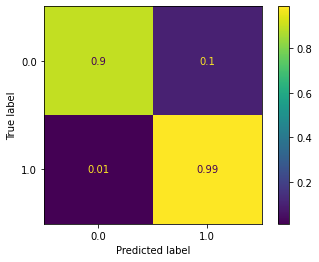

******
Roc Curve


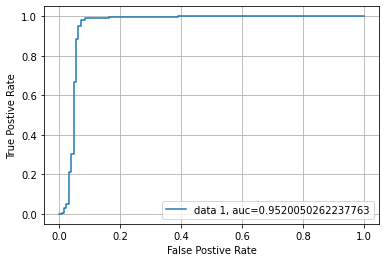

In [17]:
results_data = classifier_model(classifiers_used[0],"SVM Classifier",results_data)

**Random Forest Classifier**

Random Forest Classifier
******Evaluation Results******
Log loss is 0.1891991035551978
Precision score is  0.9656357388316151
Recall score is  0.9825174825174825
Accuracy score is  0.9637681159420289
F1 score is  0.9740034662045061
******
Confusion Matrix


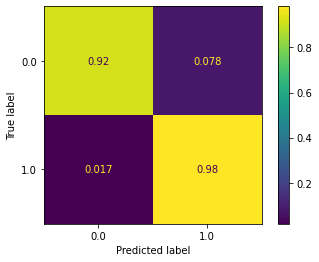

******
Roc Curve


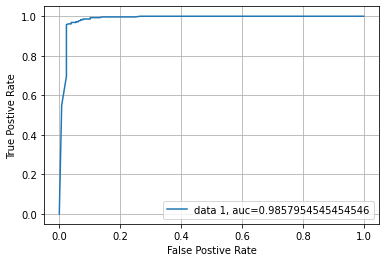

In [18]:
results_data = classifier_model(classifiers_used[1],"Random Forest Classifier",results_data)

**KNeighborsClassifier**

KNN Classifier
******Evaluation Results******
Log loss is 0.6875071916087082
Precision score is  0.9790209790209791
Recall score is  0.9790209790209791
Accuracy score is  0.9710144927536232
F1 score is  0.9790209790209791
******
Confusion Matrix


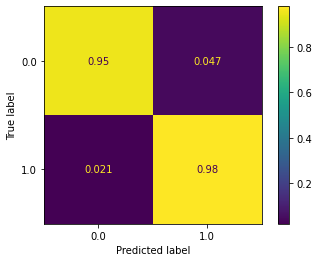

******
Roc Curve


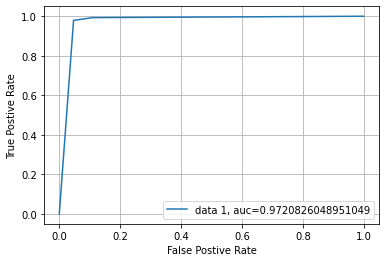

In [19]:
results_data = classifier_model(classifiers_used[2],"KNN Classifier",results_data)

**Decision Tree Classifier**

Decision Tree Classifier
******Evaluation Results******
Log loss is 1.6685399224594542
Precision score is  0.9523809523809523
Recall score is  0.9790209790209791
Accuracy score is  0.9516908212560387
F1 score is  0.9655172413793104
******
Confusion Matrix


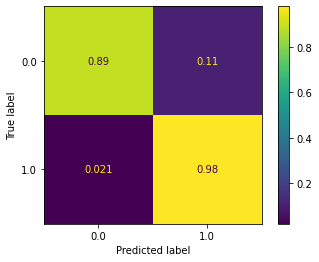

******
Roc Curve


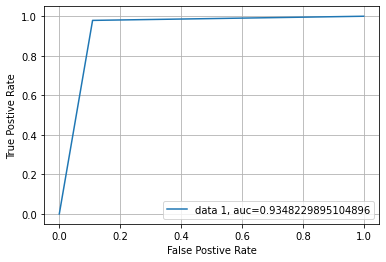

In [20]:
results_data = classifier_model(classifiers_used[3],"Decision Tree Classifier",results_data)

**AdaBoost Classifier**

AdaBoost Classifier
******Evaluation Results******
Log loss is 0.6165276023993099
Precision score is  0.9651567944250871
Recall score is  0.9685314685314685
Accuracy score is  0.9541062801932367
F1 score is  0.9668411867364747
******
Confusion Matrix


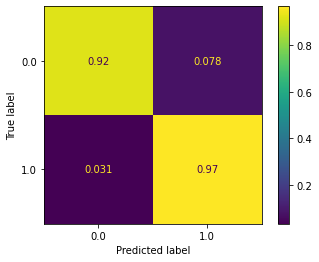

******
Roc Curve


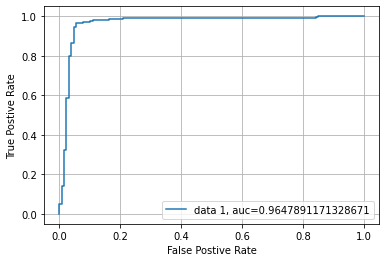

In [21]:
results_data = classifier_model(classifiers_used[4],"AdaBoost Classifier",results_data)

**Gradient Boosting Classifier**

Gradient Boosting Classifier
******Evaluation Results******
Log loss is 0.1323252752500194
Precision score is  0.962457337883959
Recall score is  0.986013986013986
Accuracy score is  0.9637681159420289
F1 score is  0.9740932642487047
******
Confusion Matrix


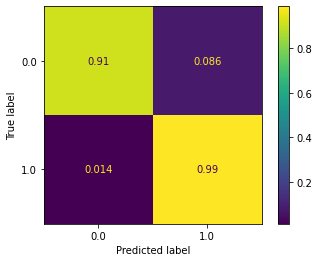

******
Roc Curve


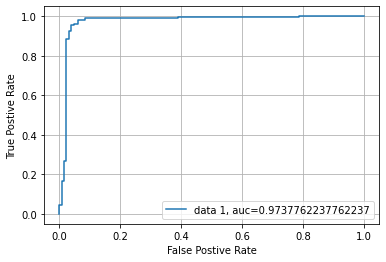

In [22]:
results_data = classifier_model(classifiers_used[5],"Gradient Boosting Classifier",results_data)

**Gaussian Naive Bayes Classifier**

Gaussian Naive Bayes Classifier
******Evaluation Results******
Log loss is 1.29017916831986
Precision score is  0.7454068241469817
Recall score is  0.993006993006993
Accuracy score is  0.7608695652173914
F1 score is  0.8515742128935533
******
Confusion Matrix


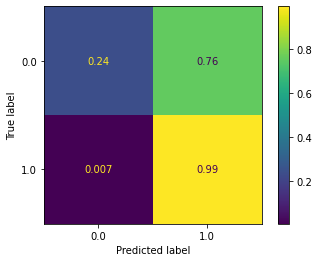

******
Roc Curve


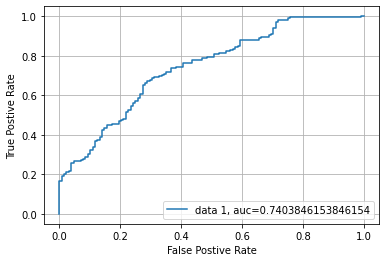

In [23]:
results_data = classifier_model(classifiers_used[6],"Gaussian Naive Bayes Classifier",results_data)

**Logistic Regression  Classifier**

Logistic Regression Classifier
******Evaluation Results******
Log loss is 0.5385891293116717
Precision score is  0.7258883248730964
Recall score is  1.0
Accuracy score is  0.7391304347826086
F1 score is  0.8411764705882353
******
Confusion Matrix


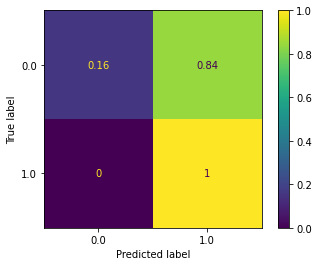

******
Roc Curve


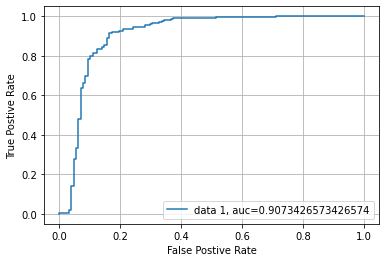

In [24]:
results_data = classifier_model(classifiers_used[7],"Logistic Regression Classifier",results_data)

**Linear Discriminant Analysis Classifier**

Linear Discriminant Analysis Classifier
******Evaluation Results******
Log loss is 0.5004001248620606
Precision score is  0.727735368956743
Recall score is  1.0
Accuracy score is  0.7415458937198067
F1 score is  0.8424153166421208
******
Confusion Matrix


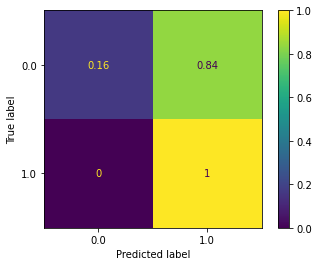

******
Roc Curve


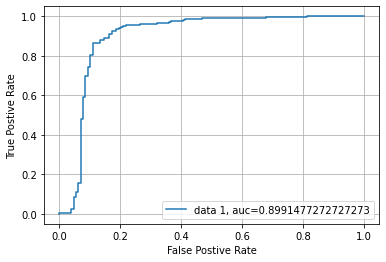

In [25]:
results_data = classifier_model(classifiers_used[8],"Linear Discriminant Analysis Classifier",results_data)

**Quadratic Discriminant Analysis Classifier**

Quadratic Discriminant Analysis Classifier
******Evaluation Results******
Log loss is 1.2994000795224718
Precision score is  0.7493333333333333
Recall score is  0.9825174825174825
Accuracy score is  0.7608695652173914
F1 score is  0.8502269288956126
******
Confusion Matrix


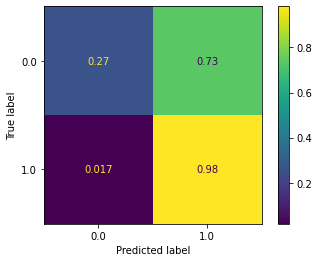

******
Roc Curve


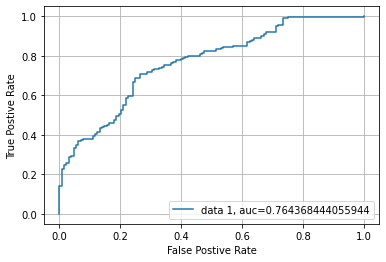

In [26]:
results_data = classifier_model(classifiers_used[9],"Quadratic Discriminant Analysis Classifier",results_data)

**Comparison between classifiers**

In [27]:
def print_comparison_plot(metric_name,results_data):
    sns.set_color_codes("muted")
    sns.barplot(x=metric_name, y='Classifier Model', data=results_data, color="blue")

    plt.xlabel(metric_name)
    plt.title('Comparison of '+metric_name+' from different classifiers')
    plt.grid()
    plt.show()

**Accuracy Comparison**

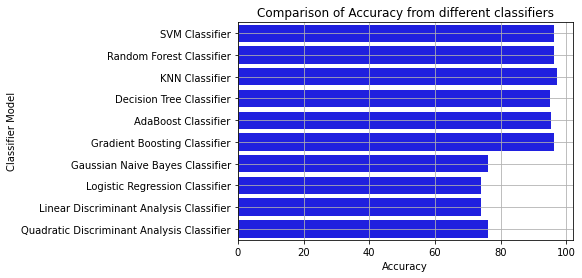

In [28]:
print_comparison_plot("Accuracy",results_data)

**Precision Comparison**

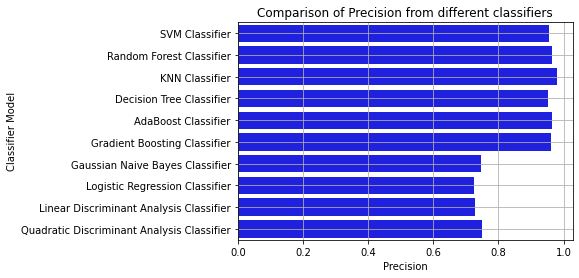

In [29]:
print_comparison_plot("Precision",results_data)

**Recall Comparison**

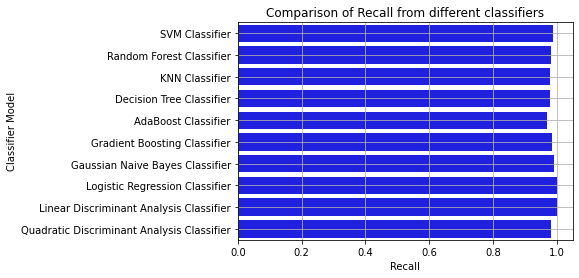

In [30]:
print_comparison_plot("Recall",results_data)

**F1 Score Comparison**

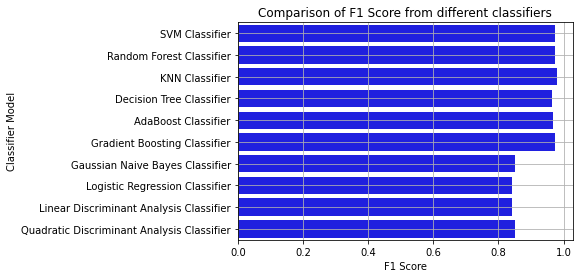

In [31]:
print_comparison_plot("F1 Score",results_data)

**Log Loss Comparison**

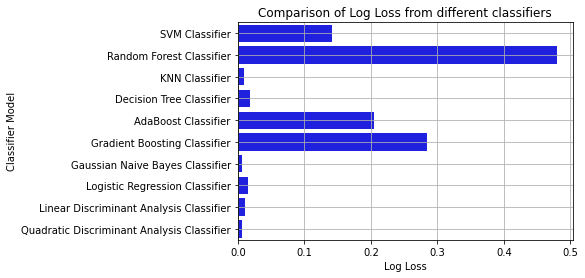

In [32]:
print_comparison_plot("Log Loss",results_data)

**Time Required Comparison**

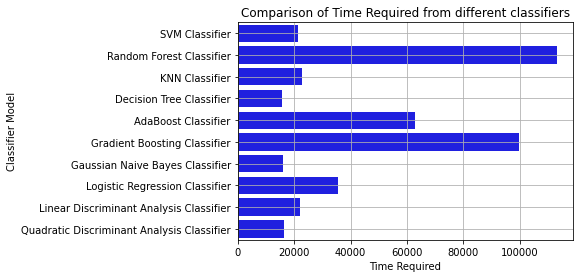

In [33]:
print_comparison_plot("Time Required",results_data)

**Memory Used Comparison**

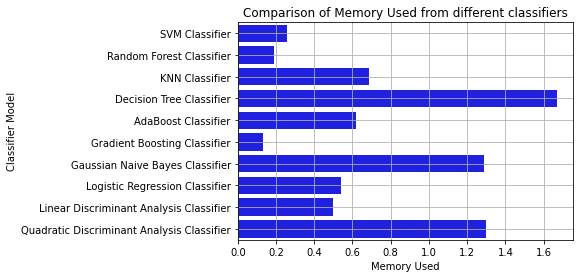

In [34]:
print_comparison_plot("Memory Used",results_data)

**Sampling**

To minimize the chance of false positives (classifying non skin as skin) or to minimize the chance of false negatives (classifying skin as non skin), sampling of data is done.

Visualization of data before sampling


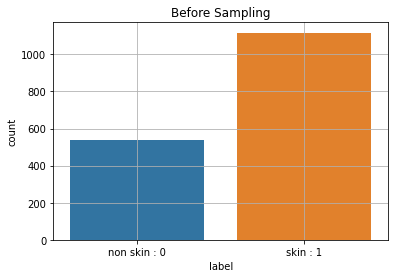

Visualization of data after Over Sampling


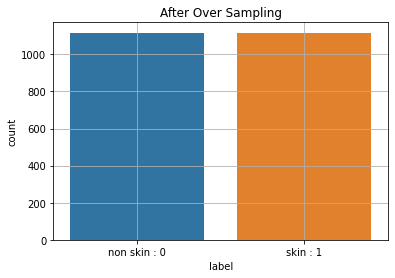

Visualization of data after Under Sampling


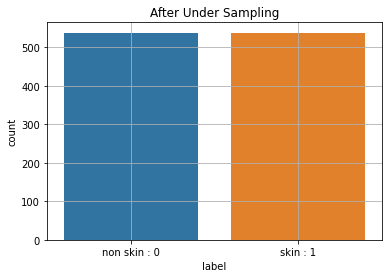

***************************************
Over-Sampling data containing NAN values
             0         1         2         3         4         5  label
0     0.015818  0.024552 -0.093773 -0.020662  0.017595  0.012953    NaN
1    -0.000922  0.027029 -0.080129 -0.021222  0.003504  0.017605    NaN
2    -0.012780 -0.034194  0.099579 -0.055327  0.012024  0.086690    NaN
3    -0.006345  0.016926  0.046307  0.010216 -0.004397  0.002007    NaN
4    -0.016663  0.020053  0.043827  0.080401 -0.052600  0.070330    NaN
...        ...       ...       ...       ...       ...       ...    ...
2229       NaN       NaN       NaN       NaN       NaN       NaN    0.0
2230       NaN       NaN       NaN       NaN       NaN       NaN    0.0
2231       NaN       NaN       NaN       NaN       NaN       NaN    0.0
2232       NaN       NaN       NaN       NaN       NaN       NaN    0.0
2233       NaN       NaN       NaN       NaN       NaN       NaN    0.0

[4468 rows x 7 columns]
******************************

In [35]:
data_for_sampling = pd.concat([file1_2016material_fake,file2_2016material,file3_2016skin,file4_Fleisch,file5_Holz,file6_Leder,file7_Stoff,file8_Referenz_Haut_6_Klassen], axis=0, ignore_index=True)
X = data_for_sampling.iloc[:,0:-1]
y = data_for_sampling[['label']]

print("Visualization of data before sampling")
sns.countplot('label', data=data_for_sampling)
plt.title('Before Sampling')
plt.xticks(np.arange(len(('non skin : 0','skin : 1'))), ('non skin : 0','skin : 1'))
plt.grid()
plt.show()


#Over-Sampling is done here with SMOTE function using imblearn
print("Visualization of data after Over Sampling")
oversampling = SMOTE()
X_oversample_data, y_oversample_data = oversampling.fit_resample(X, y)
oversampled_data = pd.concat([X_oversample_data, y_oversample_data])
sns.countplot('label', data=oversampled_data)
plt.title('After Over Sampling')
plt.xticks(np.arange(len(('non skin : 0','skin : 1'))), ('non skin : 0','skin : 1'))
plt.grid()
plt.show()


#Under-Sampling is done here
print("Visualization of data after Under Sampling")
class_1,class_2 = data_for_sampling.label.value_counts()
c1 = data_for_sampling[data_for_sampling['label'] == 0]
c2 = data_for_sampling[data_for_sampling['label'] == 1]
df_3 = c2.sample(class_2)
df_2 = c1.sample(class_2)
undersampled_data = pd.concat([df_3, df_2])
sns.countplot('label', data=undersampled_data)
plt.title('After Under Sampling')
plt.xticks(np.arange(len(('non skin : 0','skin : 1'))), ('non skin : 0','skin : 1'))
plt.grid()
plt.show()


print("*"*39)
print("Over-Sampling data containing NAN values")
print(oversampled_data)
oversampled_data = oversampled_data.fillna(0)
print("*"*39)
print("Replacing NAN with 0 after Over-Sampling")
print(oversampled_data)

In [36]:
X_oversample = oversampled_data.iloc[:,0:-1]
y_oversample = oversampled_data[['label']]

#Splitting the data
X_train_oversample, X_test_oversample, y_train_oversample, y_test_oversample = train_test_split(X_oversample, y_oversample, test_size=0.25, random_state=42)

X_undersample = undersampled_data.iloc[:,0:-1]
y_undersample = undersampled_data[['label']]

X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, y_undersample, test_size=0.25, random_state=42)

In [37]:
cols2=["Classifier Model", "Accuracy", "Precision", "Recall", "F1 Score", "Log Loss", "Time Required", "Memory Used"]
oversam_data = pd.DataFrame(columns=cols2)
oversam_results_data = pd.DataFrame(columns=cols2)

undersam_data = pd.DataFrame(columns=cols2)
undersam_results_data = pd.DataFrame(columns=cols2)

def evaluate_classifier(classifier_model_name,xtest,y_test,starttime,stoptime):
    time_required = stoptime - starttime
    pred = classifier_model_name.predict(xtest)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    prob_pred = classifier_model_name.predict_proba(xtest)
    ll = log_loss(y_test, prob_pred)
    return time, precision, recall, acc, f1, ll

In [38]:
classifiers_used = [
    SVC(kernel="rbf", probability=True),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors=2),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]



def classifier_model_sampling(clasifier_model,classifier_name,oversam_results_data,undersam_results_data):
    
    tracemalloc.start()
    start = time.time()
    clasifier_model.fit(X_train, y_train)
    stop = time.time()
    classifier_memory = tracemalloc.get_tracemalloc_memory()
    tracemalloc.stop()


    print(classifier_name)
    
    time_required, precision, recall, acc, f1, ll = evaluate_classifier(clasifier_model, X_test_oversample, y_test_oversample, start, stop)
    print("******Over-Sampling Evaluation Results******")
    print("Log loss is",ll)
    print("Precision score is ",precision)
    print("Recall score is ",recall)
    print("Accuracy score is ",acc)
    print("F1 score is ",f1)
    print("******")
    print("Confusion Matrix")
    plot_confusion_matrix(clasifier_model, X_test, y_test,normalize='true')
    plt.show()
    
    oversam_evaluation_results_data = pd.DataFrame([[classifier_name, acc*100, precision, recall, f1, (stop-start), classifier_memory, ll]], columns=cols)
    oversam_results_data = oversam_results_data.append(oversam_evaluation_results_data)
    
    time_required, precision, recall, acc, f1, ll = evaluate_classifier(clasifier_model, X_test_undersample, y_test_undersample, start, stop)
    print("******Under-Sampling Evaluation Results******")
    print("Log loss is",ll)
    print("Precision score is ",precision)
    print("Recall score is ",recall)
    print("Accuracy score is ",acc)
    print("F1 score is ",f1)
    print("******")
    print("Confusion Matrix")
    plot_confusion_matrix(clasifier_model, X_test, y_test,normalize='true')
    plt.show()
    
    undersam_evaluation_results_data = pd.DataFrame([[classifier_name, acc*100, precision, recall, f1, (stop-start), classifier_memory, ll]], columns=cols)
    undersam_results_data = undersam_results_data.append(undersam_evaluation_results_data)
    
    return oversam_results_data,undersam_results_data

#     return results_data

**SVM Classifier after Over-Sampling and Under_Sampling**

SVM Classifier
******Over-Sampling Evaluation Results******
Log loss is 1.739086492067707
Precision score is  0.0
Recall score is  0.0
Accuracy score is  0.5013428827215757
F1 score is  0.0
******
Confusion Matrix


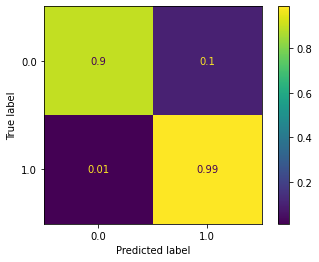

******Under-Sampling Evaluation Results******
Log loss is 0.1497293570877643
Precision score is  0.9452054794520548
Recall score is  1.0
Accuracy score is  0.9702602230483272
F1 score is  0.971830985915493
******
Confusion Matrix


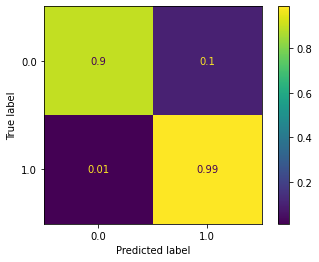

In [39]:
oversam_results_data,undersam_results_data = classifier_model_sampling(classifiers_used[0],"SVM Classifier",oversam_results_data,undersam_results_data)

**Random Forest Classifier after Over-Sampling and Under_Sampling**

Random Forest Classifier
******Over-Sampling Evaluation Results******
Log loss is 6.541123368481217
Precision score is  0.0
Recall score is  0.0
Accuracy score is  0.5102954341987467
F1 score is  0.0
******
Confusion Matrix


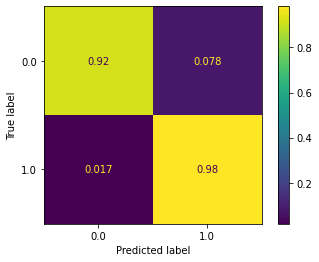

******Under-Sampling Evaluation Results******
Log loss is 0.04629551586017321
Precision score is  0.9857142857142858
Recall score is  1.0
Accuracy score is  0.9925650557620818
F1 score is  0.9928057553956835
******
Confusion Matrix


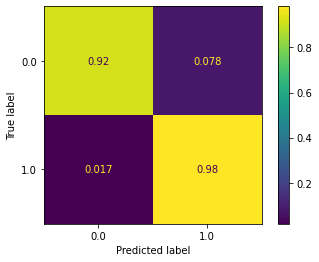

In [40]:
oversam_results_data,undersam_results_data = classifier_model_sampling(classifiers_used[1],"Random Forest Classifier",oversam_results_data,undersam_results_data)

**KNN Classifier after Over-Sampling and Under_Sampling**

KNN Classifier
******Over-Sampling Evaluation Results******
Log loss is 16.649159300299253
Precision score is  0.0
Recall score is  0.0
Accuracy score is  0.5183527305282005
F1 score is  0.0
******
Confusion Matrix


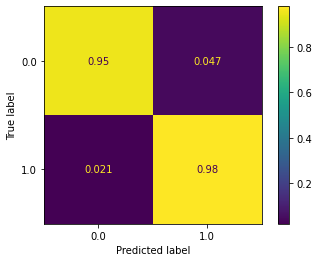

******Under-Sampling Evaluation Results******
Log loss is 0.1412807148613779
Precision score is  0.9928057553956835
Recall score is  1.0
Accuracy score is  0.9962825278810409
F1 score is  0.996389891696751
******
Confusion Matrix


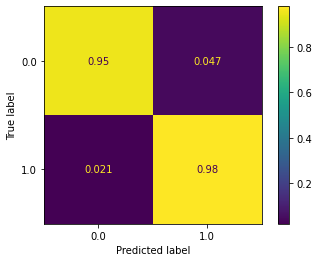

In [41]:
oversam_results_data,undersam_results_data = classifier_model_sampling(classifiers_used[2],"KNN Classifier",oversam_results_data,undersam_results_data)

**Decision Tree Classifier after Over-Sampling and Under_Sampling**

Decision Tree Classifier
******Over-Sampling Evaluation Results******
Log loss is 17.09932260195668
Precision score is  0.0
Recall score is  0.0
Accuracy score is  0.5049239033124441
F1 score is  0.0
******
Confusion Matrix


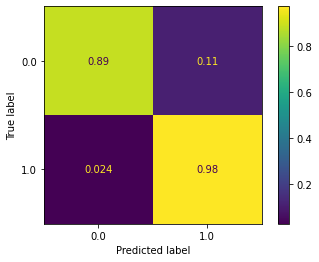

******Under-Sampling Evaluation Results******
Log loss is 0.6419846913552181
Precision score is  0.965034965034965
Recall score is  1.0
Accuracy score is  0.9814126394052045
F1 score is  0.9822064056939501
******
Confusion Matrix


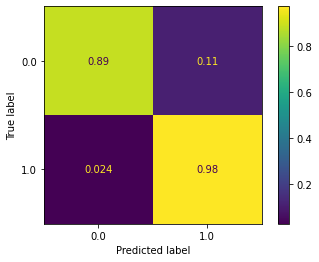

In [42]:
oversam_results_data,undersam_results_data = classifier_model_sampling(classifiers_used[3],"Decision Tree Classifier",oversam_results_data,undersam_results_data)

**AdaBoost Classifier after Over-Sampling and Under_Sampling**

AdaBoost Classifier
******Over-Sampling Evaluation Results******
Log loss is 0.6848993166491382
Precision score is  0.0
Recall score is  0.0
Accuracy score is  0.5040286481647269
F1 score is  0.0
******
Confusion Matrix


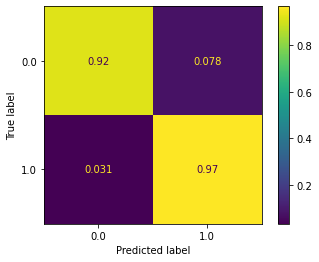

******Under-Sampling Evaluation Results******
Log loss is 0.600682882175122
Precision score is  0.971830985915493
Recall score is  1.0
Accuracy score is  0.9851301115241635
F1 score is  0.9857142857142858
******
Confusion Matrix


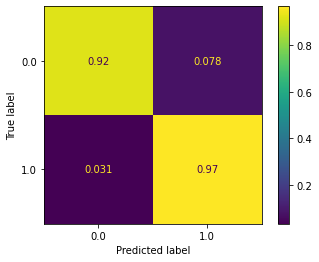

In [43]:
oversam_results_data,undersam_results_data = classifier_model_sampling(classifiers_used[4],"AdaBoost Classifier",oversam_results_data,undersam_results_data)

**Gradient Boosting Classifier after Over-Sampling and Under_Sampling**

Gradient Boosting Classifier
******Over-Sampling Evaluation Results******
Log loss is 1.7794501750541538
Precision score is  0.0
Recall score is  0.0
Accuracy score is  0.5031333930170099
F1 score is  0.0
******
Confusion Matrix


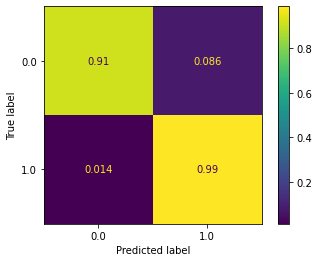

******Under-Sampling Evaluation Results******
Log loss is 0.05651797334852089
Precision score is  0.9857142857142858
Recall score is  1.0
Accuracy score is  0.9925650557620818
F1 score is  0.9928057553956835
******
Confusion Matrix


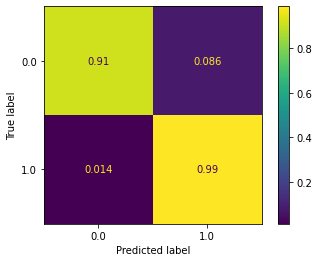

In [44]:
oversam_results_data,undersam_results_data = classifier_model_sampling(classifiers_used[5],"Gradient Boosting Classifier",oversam_results_data,undersam_results_data)

**GaussianNB Classifier after Over-Sampling and Under_Sampling**

GaussianNB Classifier
******Over-Sampling Evaluation Results******
Log loss is 3.7878804256689946
Precision score is  0.25346534653465347
Recall score is  1.0
Accuracy score is  0.3249776186213071
F1 score is  0.40442338072669826
******
Confusion Matrix


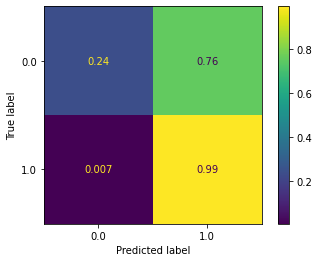

******Under-Sampling Evaluation Results******
Log loss is 1.4727771690032525
Precision score is  0.6325581395348837
Recall score is  0.9855072463768116
Accuracy score is  0.6988847583643123
F1 score is  0.7705382436260624
******
Confusion Matrix


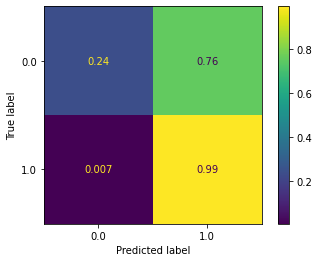

In [45]:
oversam_results_data,undersam_results_data = classifier_model_sampling(classifiers_used[6],"GaussianNB Classifier",oversam_results_data,undersam_results_data)

**Logistic Regression Classifier after Over-Sampling and Under_Sampling**

Logistic Regression Classifier
******Over-Sampling Evaluation Results******
Log loss is 3.7878804256689946
Precision score is  0.25346534653465347
Recall score is  1.0
Accuracy score is  0.3249776186213071
F1 score is  0.40442338072669826
******
Confusion Matrix


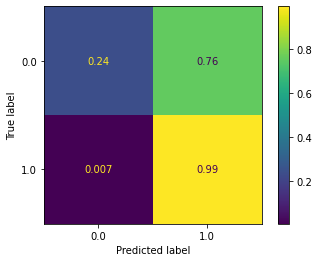

******Under-Sampling Evaluation Results******
Log loss is 1.4727771690032525
Precision score is  0.6325581395348837
Recall score is  0.9855072463768116
Accuracy score is  0.6988847583643123
F1 score is  0.7705382436260624
******
Confusion Matrix


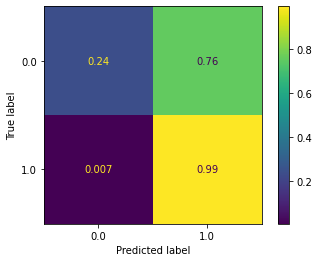

In [46]:
oversam_results_data,undersam_results_data = classifier_model_sampling(classifiers_used[6],"Logistic Regression Classifier",oversam_results_data,undersam_results_data)

**Linear Discriminant Analysis Classifier after Over-Sampling and Under_Sampling**

Linear Discriminant Analysis Classifier
******Over-Sampling Evaluation Results******
Log loss is 3.7878804256689946
Precision score is  0.25346534653465347
Recall score is  1.0
Accuracy score is  0.3249776186213071
F1 score is  0.40442338072669826
******
Confusion Matrix


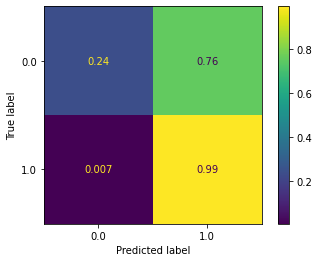

******Under-Sampling Evaluation Results******
Log loss is 1.4727771690032525
Precision score is  0.6325581395348837
Recall score is  0.9855072463768116
Accuracy score is  0.6988847583643123
F1 score is  0.7705382436260624
******
Confusion Matrix


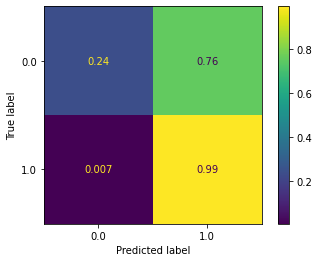

In [47]:
oversam_results_data,undersam_results_data = classifier_model_sampling(classifiers_used[6],"Linear Discriminant Analysis Classifier",oversam_results_data,undersam_results_data)

**Quadratic Discriminant Analysis Classifier after Over-Sampling and Under_Sampling**

Quadratic Discriminant Analysis Classifier
******Over-Sampling Evaluation Results******
Log loss is 3.7878804256689946
Precision score is  0.25346534653465347
Recall score is  1.0
Accuracy score is  0.3249776186213071
F1 score is  0.40442338072669826
******
Confusion Matrix


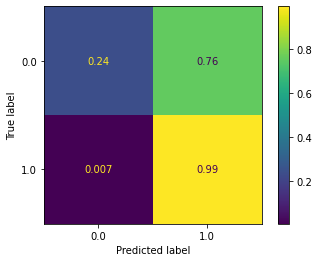

******Under-Sampling Evaluation Results******
Log loss is 1.4727771690032525
Precision score is  0.6325581395348837
Recall score is  0.9855072463768116
Accuracy score is  0.6988847583643123
F1 score is  0.7705382436260624
******
Confusion Matrix


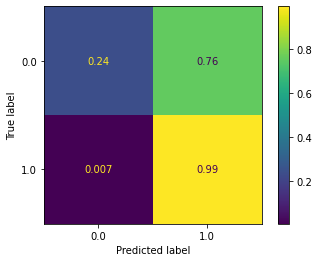

In [48]:
oversam_results_data,undersam_results_data = classifier_model_sampling(classifiers_used[6],"Quadratic Discriminant Analysis Classifier",oversam_results_data,undersam_results_data)

**Comparison between Over-Sampling and Under-Sampling of data to show trade-off between false positives and false negatives**

In [49]:
def print_comparison_plot2(metric_name,oversam_results_data,undersam_results_data):
    print("Over-Sampling")
    print("*"*39)
    sns.set_color_codes("muted")
    sns.barplot(x=metric_name, y='Classifier Model', data=oversam_results_data, color="blue")

    plt.xlabel(metric_name)
    plt.title('Comparison of '+metric_name+' from different classifiers')
    plt.grid()
    plt.show()
    
    
    print("Under-Sampling")
    print("*"*39)
    sns.set_color_codes("muted")
    sns.barplot(x=metric_name, y='Classifier Model', data=undersam_results_data, color="blue")

    plt.xlabel(metric_name)
    plt.title('Comparison of '+metric_name+' from different classifiers')
    plt.grid()
    plt.show()

**Accuracy comparison after Over-Sampling and Under-Sampling**

Over-Sampling
***************************************


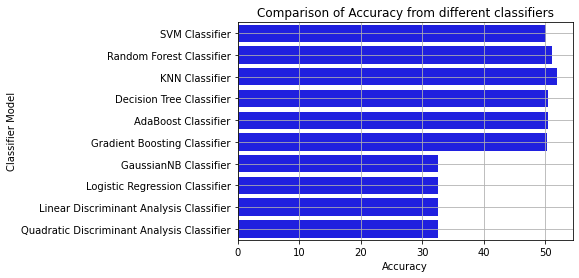

Under-Sampling
***************************************


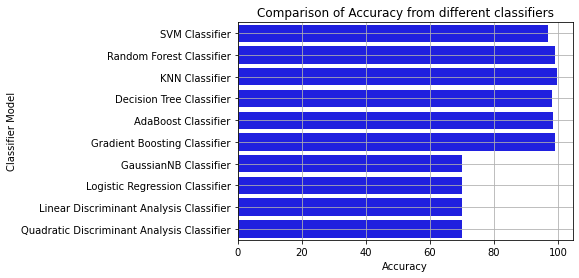

In [50]:
print_comparison_plot2("Accuracy",oversam_results_data,undersam_results_data)

**Precision comparison after Over-Sampling and Under-Sampling**

Over-Sampling
***************************************


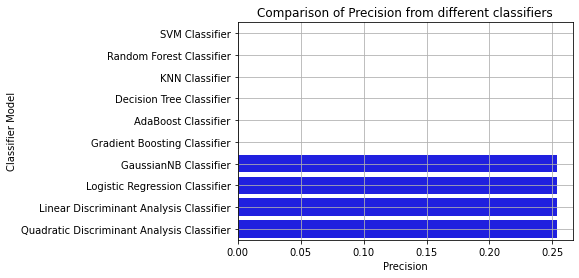

Under-Sampling
***************************************


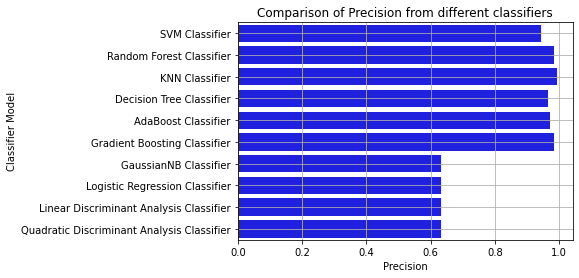

In [51]:
print_comparison_plot2("Precision",oversam_results_data,undersam_results_data)

**Recall comparison after Over-Sampling and Under-Sampling**

Over-Sampling
***************************************


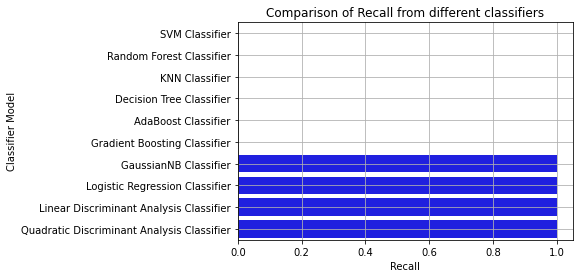

Under-Sampling
***************************************


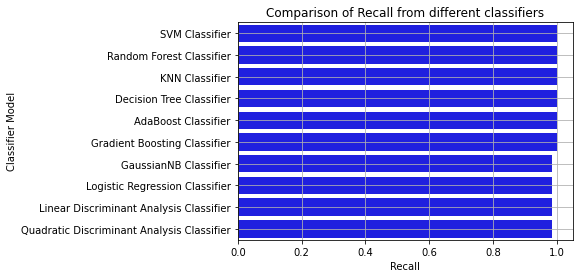

In [52]:
print_comparison_plot2("Recall",oversam_results_data,undersam_results_data)

**F1 Score comparison after Over-Sampling and Under-Sampling**

Over-Sampling
***************************************


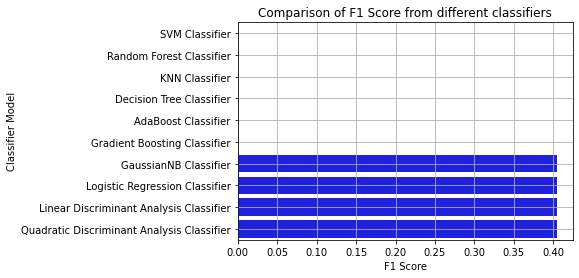

Under-Sampling
***************************************


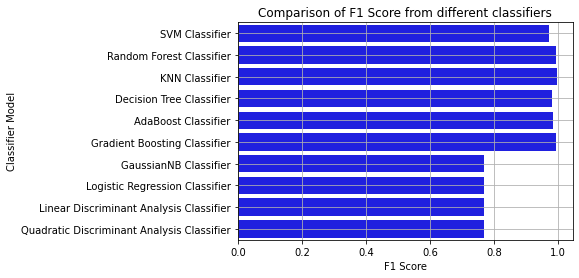

In [53]:
print_comparison_plot2("F1 Score",oversam_results_data,undersam_results_data)

**Log Loss comparison after Over-Sampling and Under-Sampling**

Over-Sampling
***************************************


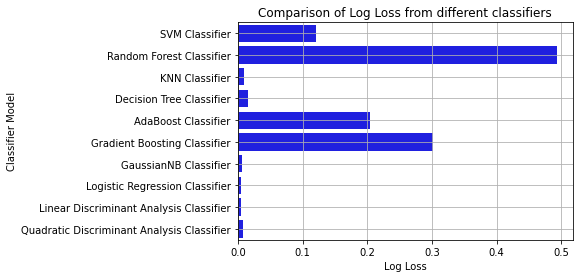

Under-Sampling
***************************************


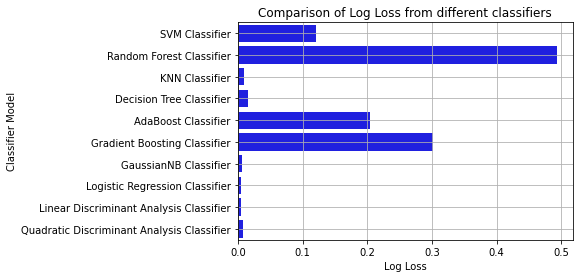

In [54]:
print_comparison_plot2("Log Loss",oversam_results_data,undersam_results_data)

**Time Required comparison after Over-Sampling and Under-Sampling**

Over-Sampling
***************************************


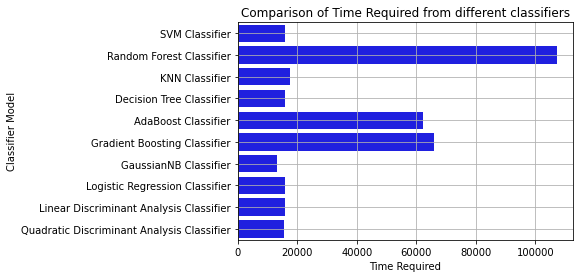

Under-Sampling
***************************************


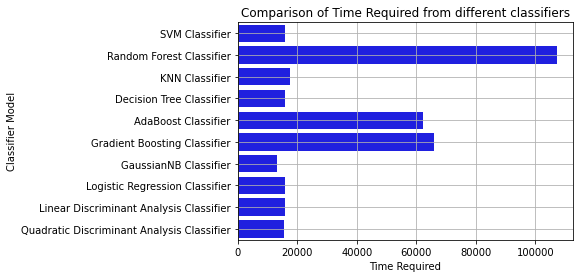

In [55]:
print_comparison_plot2("Time Required",oversam_results_data,undersam_results_data)

**Memory Used comparison after Over-Sampling and Under-Sampling**

Over-Sampling
***************************************


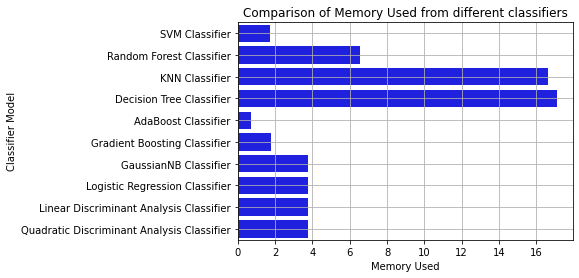

Under-Sampling
***************************************


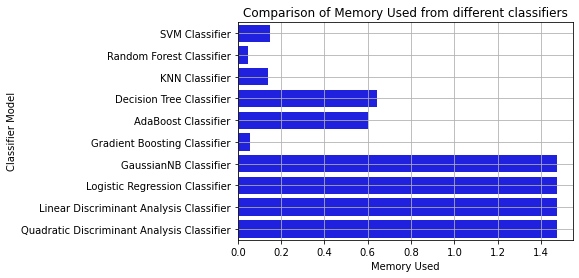

In [56]:
print_comparison_plot2("Memory Used",oversam_results_data,undersam_results_data)